# Data Preparation Exercises

## Using your store items data:

In [1]:
import pandas as pd

import requests

from imports import *

## 1. Convert date column to datetime format.

In [2]:
df = pd.read_csv('complete_sale.csv')

## 2. Plot the distribution of `sale_amount` and `item_price`.

In [3]:
df.head()

,Unnamed: 0,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [ ]:
# Drop meaningless column
df = df.drop(columns = 'Unnamed: 0')

<AxesSubplot:title={'center':'Sale Amount Distribution'}, xlabel='sale_amount', ylabel='Density'>

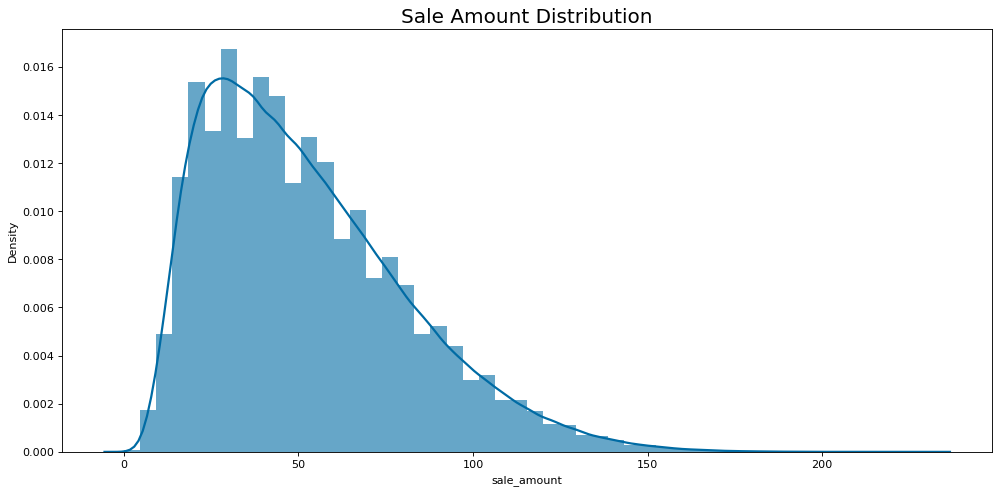

In [7]:
# Sale amount distribution
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
plt.title('Sale Amount Distribution', fontsize = 18)
sns.distplot(df.sale_amount, color="#006ba4", label="Sale Amount", **kwargs)

<AxesSubplot:title={'center':'Item Price Distribution'}, xlabel='item_price', ylabel='Density'>

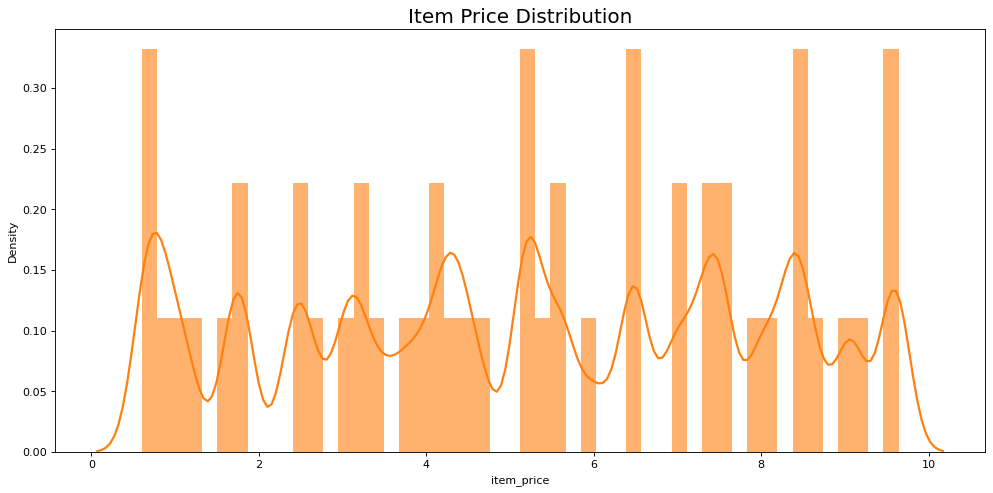

In [10]:
# Item price distribution
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
plt.title('Item Price Distribution', fontsize = 18)
sns.distplot(df.item_price, color="#ff800e", label="Item Price", **kwargs)

## 3. Set the index to be the datetime variable.

In [7]:
# Convert sale date to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)

In [8]:
# Set the sale_date column as the index
df.set_index('sale_date', inplace=True)
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-02,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-03,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-04,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-05,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [9]:
# Sort the index
df.sort_index(inplace=True)
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221


## 4. Add a 'month' and 'day of week' column to your dataframe.

In [11]:
# Getting month from dates
df['month'] = df.index.strftime('%b')

In [ ]:
df['day_of_week'] = df.index.strftime('%A')

## 5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.

In [13]:
df['sales_total'] = df['sale_amount'] * df['item_price']

## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [39]:
def prep_sales(df):
    # Drop meaningless columns
    df = df.drop(columns = 'Unnamed: 0')
    
    # Convert date to datatime object
    df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)
    
    # Set date as index
    df.set_index('sale_date', inplace=True)
    # Sort index
    df.sort_index(inplace=True)
    
    # Create month, day_of_week columns
    df['month'] = df.index.strftime('%b')
    df['day_of_week'] = df.index.strftime('%A')
    
    # Create sales total
    df['sales_total'] = df['sale_amount'] * df['item_price']
    
    return df

***

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

## 1. Convert date column to datetime format.

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

## 2. Plot the distribution of each of your variables.


<AxesSubplot:title={'center':'Consumption Distribution'}, xlabel='Consumption', ylabel='Density'>

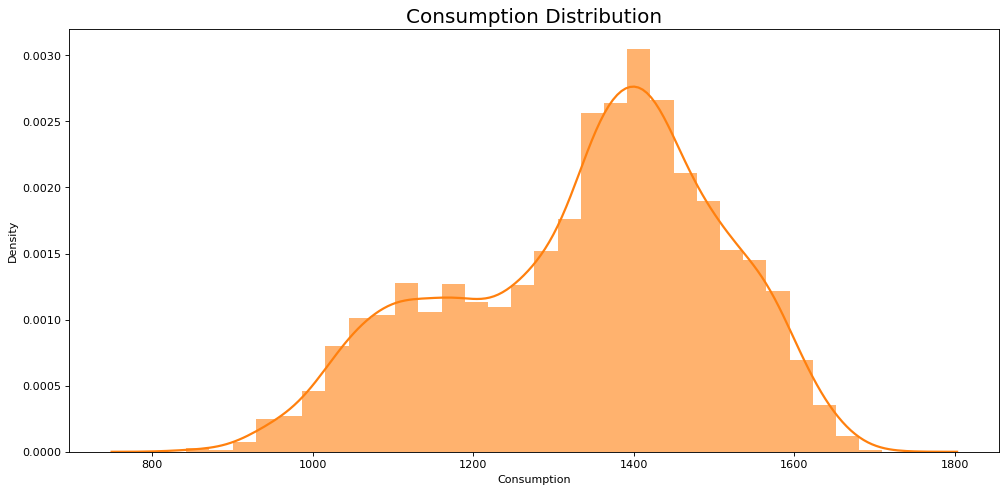

In [22]:
# Consumption distribution
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
plt.title('Consumption Distribution', fontsize = 18)
sns.distplot(df.Consumption, color="#ff800e", **kwargs)

<AxesSubplot:title={'center':'Wind Distribution'}, xlabel='Wind', ylabel='Density'>

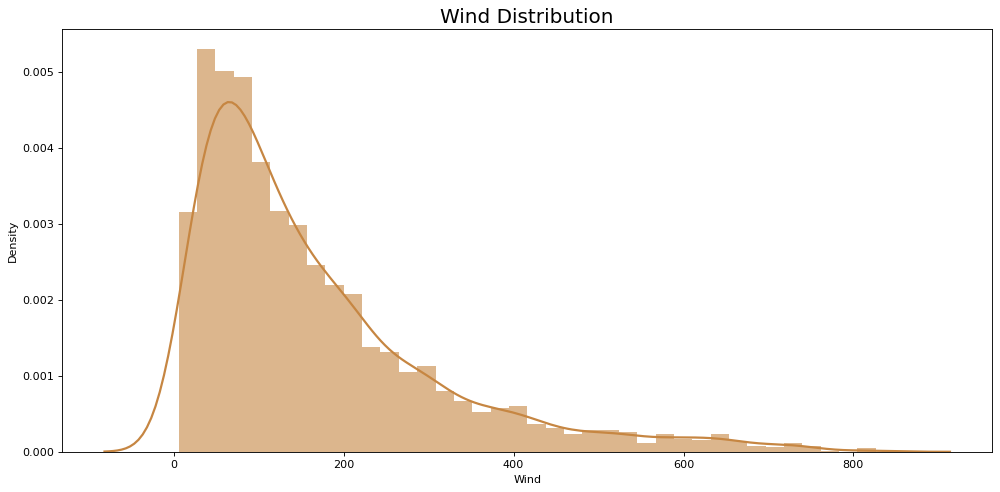

In [24]:
# Consumption distribution
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
plt.title('Wind Distribution', fontsize = 18)
sns.distplot(df.Wind, color="#c68642", **kwargs)

<AxesSubplot:title={'center':'Solar Distribution'}, xlabel='Solar', ylabel='Density'>

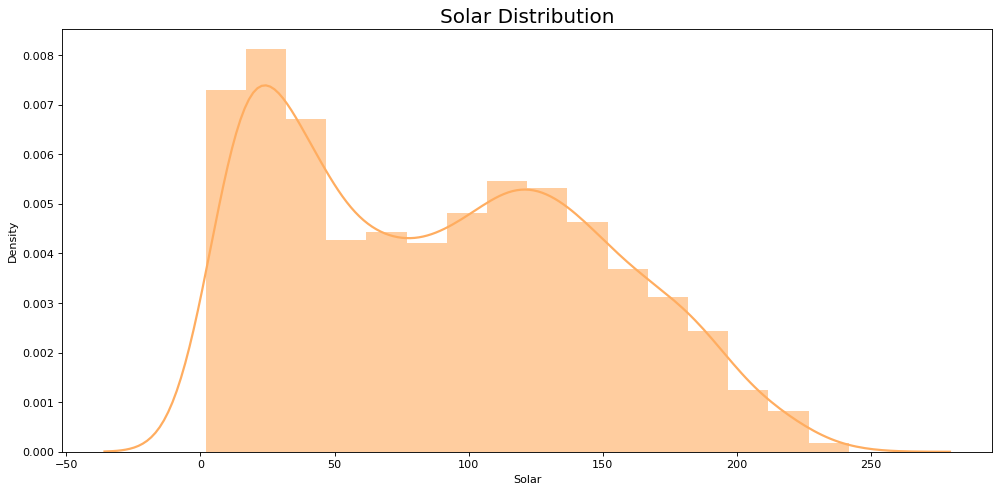

In [25]:
# Consumption distribution
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
plt.title('Solar Distribution', fontsize = 18)
sns.distplot(df.Solar, color="#ffad60", **kwargs)

<AxesSubplot:title={'center':'Wind & Solar Distribution'}, xlabel='Wind+Solar', ylabel='Density'>

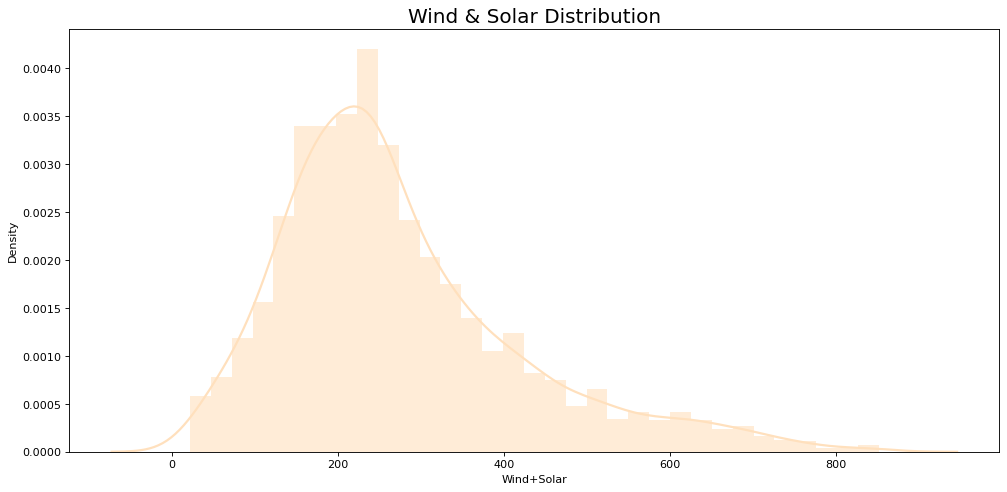

In [26]:
# Consumption distribution
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(15,7), dpi= 80)
plt.title('Wind & Solar Distribution', fontsize = 18)
sns.distplot(df['Wind+Solar'], color="#ffe0bd", **kwargs)

## 3. Set the index to be the datetime variable.

In [19]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [21]:
# Set the sale_date column as the index
df.set_index('Date', inplace=True)

## 4. Add a month and a year column to your dataframe.

In [27]:
df['Month'] = df.index.strftime('%b')

In [28]:
df['Year'] = df.index.strftime('%Y')

## 5. Fill any missing values.

In [31]:
df.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
Month             0
Year              0
dtype: int64

In [32]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [35]:
# Replace Wind missing value with mean
df = df.fillna({"Wind":168.814173})
# Replace Solar missing value with mean
df = df.fillna({"Solar":89.2586952})

In [37]:
# Replace Wind + Solar missing value with Wind + Solar
df = df.fillna({"Wind+Solar":(df.Wind + df.Solar)})

## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [38]:
def prep_ops(df):
    # Change date to datetime object
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    
    # Set the sale_date column as the index
    df.set_index('Date', inplace=True)
    
    # Create column for month
    df['Month'] = df.index.strftime('%b')
    # Create column for yaer
    df['Year'] = df.index.strftime('%Y')
    
    # Fill missing values
    # Replace Wind missing value with mean
    df = df.fillna({"Wind":168.814173})
    # Replace Solar missing value with mean
    df = df.fillna({"Solar":89.2586952})
    # Replace Wind + Solar missing value with Wind + Solar
    df = df.fillna({"Wind+Solar":(df.Wind + df.Solar)})
    
    return df